# Data Science & Machine Learning - Car price prediction project

## Data science

### Filtering dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_excel('../data/carset_formatted.xlsx')

In [3]:
df

,Модель,Год выпуска,Коробка передач,Цвет,Вид топлива,Состояние машины,Пробег (км),Цена ($)
0,Nexia,2017,Автоматическая,Серебристый,Бензин,Отличное,39500.0,11800.0
1,Matiz,2011,Механическая,Белый,Бензин,Отличное,208000.0,6500.0
2,Lacetti,2022,Механическая,Черный,Бензин,Отличное,0.0,11851.0
3,Lacetti,2019,Автоматическая,Белый,Бензин,Отличное,74000.0,14500.0
4,Damas,2017,Механическая,Белый,Бензин,Отличное,166000.0,8300.0
...,...,...,...,...,...,...,...,...
16846,Lacetti,2014,Автоматическая,Белый,Газ/Бензин,Отличное,175000.0,11800.0
16847,Lacetti,2023,Механическая,Белый,Бензин,Отличное,NaN,11851.0
16848,Lacetti,2022,Автоматическая,Черный,Бензин,Отличное,29000.0,16400.0
16849,Lacetti,2023,Автоматическая,Черный,Бензин,Отличное,0.0,17200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16851 entries, 0 to 16850
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Модель            16851 non-null  object 
 1   Год выпуска       16851 non-null  int64  
 2   Коробка передач   16838 non-null  object 
 3   Цвет              16838 non-null  object 
 4   Вид топлива       16838 non-null  object 
 5   Состояние машины  16838 non-null  object 
 6   Пробег (км)       16432 non-null  float64
 7   Цена ($)          16828 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.0+ MB


In [5]:
df.describe()

,Год выпуска,Пробег (км),Цена ($)
count,16851.000000,1.643200e+04,16828.000000
mean,2017.378316,7.031865e+04,18075.237996
std,56.264825,1.433720e+05,13327.901665
min,0.000000,0.000000e+00,1.000000
25%,2015.000000,0.000000e+00,10000.000000
50%,2021.000000,2.555000e+04,14500.000000
75%,2023.000000,1.000000e+05,22900.000000
max,2025.000000,6.000000e+06,115000.000000


In [6]:
df.value_counts('Модель')

Модель
Lacetti        1581
Cobalt         1539
Spark          1438
Nexia          1434
Damas          1406
Tracker        1377
Malibu         1352
Matiz          1352
Captiva        1338
Monza          1319
Equinox        1154
Epica           569
Tahoe           356
Orlando         284
Trailblazer     281
Другая           57
Chevelle          4
Aveo              3
Cruze             2
2500              2
Niva              1
Beretta           1
Van               1
Name: count, dtype: int64

In [7]:
excluded_cars = ['Van', 'Beretta', 'Niva', '2500', 'Cruze', 'Aveo', 'Chevelle', 'Другая']
excluded_df = df[df.isin(excluded_cars)]

In [8]:
df = df[~df['Модель'].isin(excluded_cars)] # Excluding cars

In [9]:
df = df[~df['Цена ($)'].isnull()] # Excluding objects with no label

In [10]:
len(df) - len(df.dropna())

414

In [11]:
df = df.dropna()

In [12]:
df_sorted = df.sort_values(by='Год выпуска', ascending=False)
df_sorted.tail(4)

,Модель,Год выпуска,Коробка передач,Цвет,Вид топлива,Состояние машины,Пробег (км),Цена ($)
965,Damas,1992,Механическая,Белый,Бензин,Хорошее,280000.0,3290.0
2664,Damas,1992,Механическая,Белый,Бензин,Хорошее,280000.0,3290.0
803,Captiva,1913,Автоматическая,Белый,Бензин,Отличное,140000.0,19500.0
6141,Captiva,1913,Автоматическая,Белый,Бензин,Отличное,140000.0,19500.0


In [13]:
last_4 = df_sorted.tail(4).index
df = df.drop(last_4)

In [14]:
df.to_excel('../data/carset_clean.xlsx', index=False)

### Plotting graphs & analyzing dataset

In [15]:
import warnings
warnings.simplefilter('ignore')

In [16]:
# plt.figure(figsize=(10, 6), dpi=100)

# model_count = df.value_counts('Модель')
# model_count = model_count.sort_values(ascending=True)

# sns.barplot(x=model_count.keys(), y=model_count.values)

# plt.title('Кол-во разных Моделей машин (отсортировано)')
# plt.xticks(rotation=90)
# plt.show()

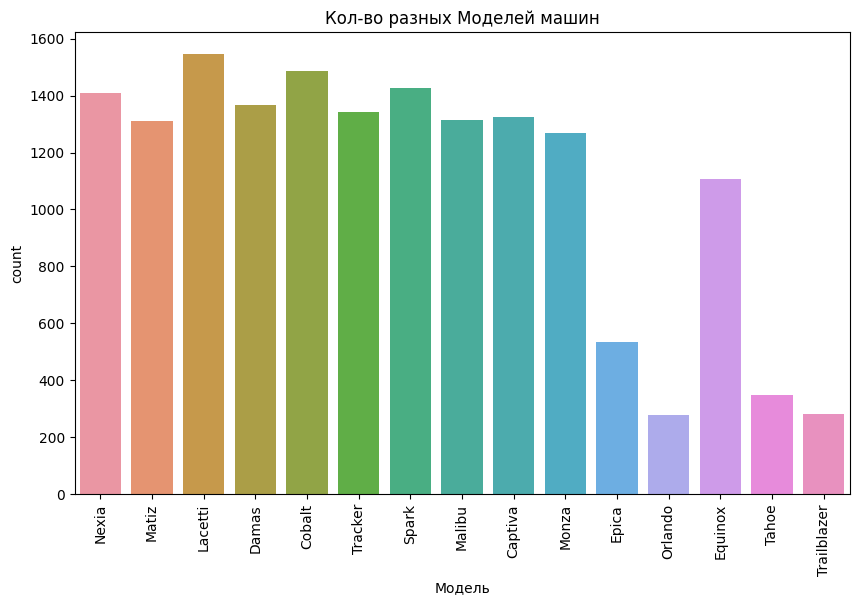

In [17]:
plt.figure(figsize=(10, 6), dpi=100)

sns.countplot(data=df, x='Модель')
 
plt.title('Кол-во разных Моделей машин')
plt.xticks(rotation=90)
plt.show()

In [18]:
mean_prices = df.groupby('Модель')['Цена ($)'].mean().reset_index()

In [19]:
mean_prices = mean_prices.sort_values('Цена ($)').reset_index()

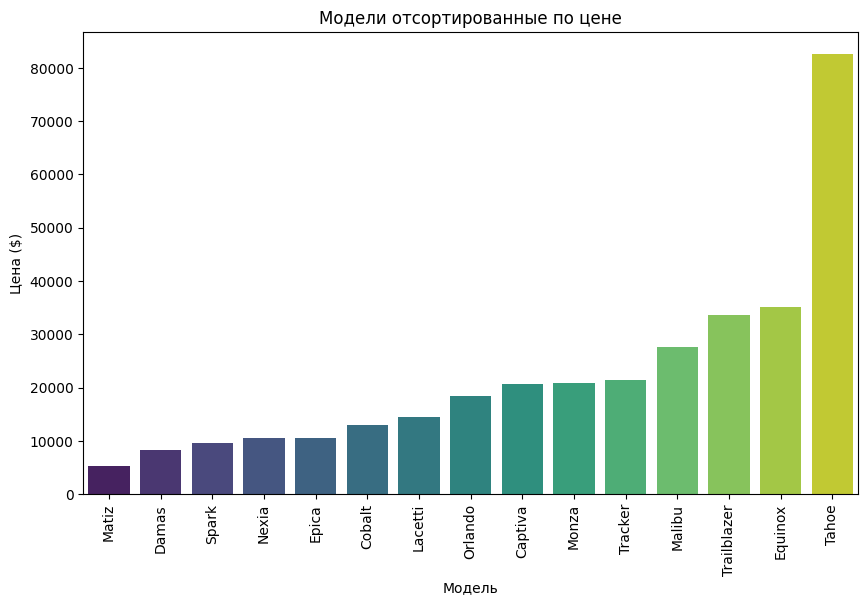

In [20]:
plt.figure(figsize=(10, 6), dpi=100)

sns.barplot(x='Модель', y='Цена ($)', data=mean_prices, palette='viridis')

plt.title('Модели отсортированные по цене')
plt.xticks(rotation=90)
plt.show()

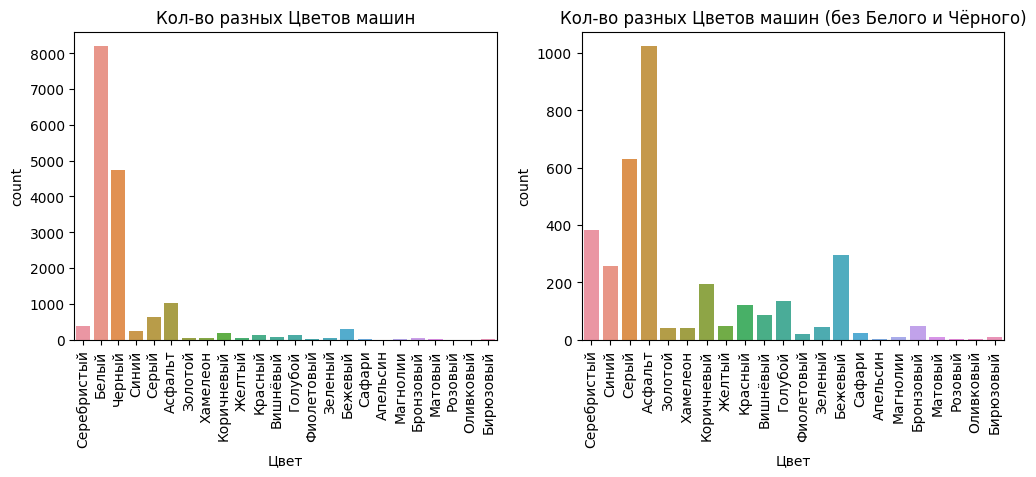

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Цвет')
plt.title('Кол-во разных Цветов машин')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt_df = df[~df.isin(['Белый', 'Черный'])]
sns.countplot(data=plt_df, x='Цвет')
plt.title('Кол-во разных Цветов машин (без Белого и Чёрного)')
plt.xticks(rotation=90)


plt.show()

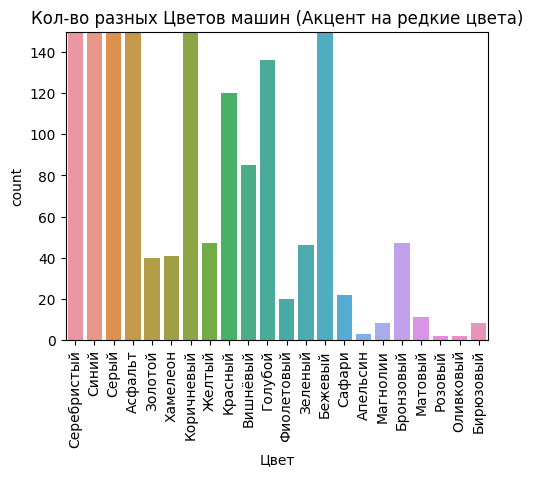

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=plt_df, x='Цвет')
plt.title('Кол-во разных Цветов машин (Акцент на редкие цвета)')
plt.xticks(rotation=90)
plt.ylim(0, 150)

plt.show()

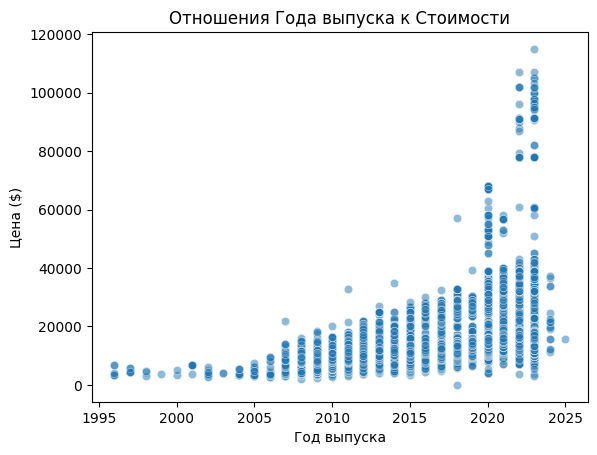

In [23]:
sns.scatterplot(data=df, x='Год выпуска', y='Цена ($)', alpha=0.5)

# plt.xlim(1990, 2025)
plt.title('Отношения Года выпуска к Стоимости')
plt.show()

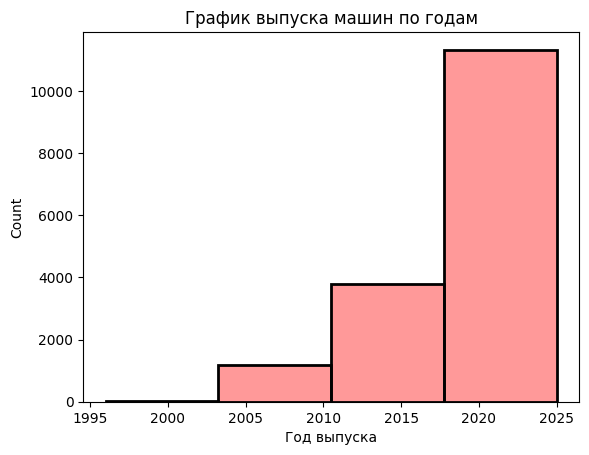

In [24]:
sns.histplot(data=df, x='Год выпуска', color='red', alpha=0.4, bins=4, lw=2)

plt.title('График выпуска машин по годам')
plt.show()

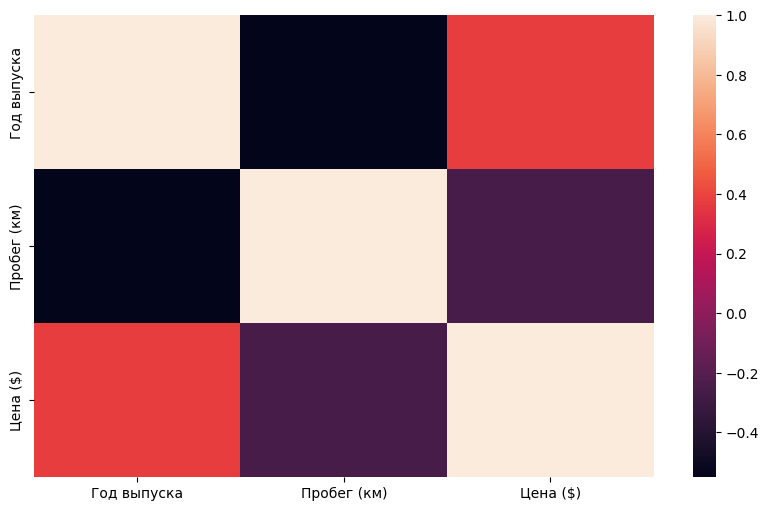

In [25]:
plt.figure(figsize=(10, 6), dpi=100)

heatmap_df = df[['Год выпуска', 'Пробег (км)', 'Цена ($)']]
heatmap_df
sns.heatmap(data=heatmap_df.corr())

plt.show()

## Machine Learning

In [26]:
df = pd.get_dummies(df)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
def show_stat(y_test, y_pred):
    # Absolute
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    print("MAE: {}".format(MAE))
    print("RMSE: {}".format(RMSE))
    # Percentage
    pc = MAE * 100 / np.mean(df['Цена ($)'])
    pc = round(pc, 1)
    print('Absolute Error Percentage: {}%'.format(pc))
    pc2 = RMSE * 100 / np.mean(df['Цена ($)'])
    pc2 = round(pc2, 1)
    print('Quadratic Error Percentage: {}%'.format(pc2))

### Linear Regression

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('Цена ($)', axis=1)
y = df['Цена ($)']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()

In [35]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [36]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.5s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
y_pred = grid_model.predict(X_test)

In [38]:
np.mean(df['Цена ($)'])

18056.146860849345

In [39]:
show_stat(y_test, y_pred)

MAE: 2153.6725376705617
RMSE: 3465.008254800707
Absolute Error Percentage: 11.9%
Quadratic Error Percentage: 19.2%


In [40]:
final_model = ElasticNet(**grid_model.best_estimator_.get_params())

In [41]:
final_model.fit(scaled_X, y)

ElasticNet(alpha=10, l1_ratio=1)

In [42]:
y_pred = final_model.predict(X_test)
show_stat(y_test, y_pred)

MAE: 2105.7596033645614
RMSE: 3440.9256746236215
Absolute Error Percentage: 11.7%
Quadratic Error Percentage: 19.1%


In [43]:
joblib.dump(final_model, 'models/linear.joblib') 

['models/linear.joblib']

### Polynomial Regression

In [44]:
X = df.drop('Цена ($)', axis=1)
y = df['Цена ($)']

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [47]:
poly_features = polynomial_converter.fit_transform(X)

In [48]:
poly_features.shape

(16342, 1539)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [50]:
model = ElasticNet(alpha=10, l1_ratio=1)

In [51]:
model.fit(X_train, y_train)

ElasticNet(alpha=10, l1_ratio=1)

In [52]:
y_pred = model.predict(X_test)

In [53]:
show_stat(y_test, y_pred)

MAE: 1706.225026483827
RMSE: 2770.3350869094975
Absolute Error Percentage: 9.4%
Quadratic Error Percentage: 15.3%


In [54]:
final_model = ElasticNet(alpha=10, l1_ratio=1)

In [55]:
final_model.fit(poly_features, y)

ElasticNet(alpha=10, l1_ratio=1)

In [56]:
y_pred = final_model.predict(X_test)
show_stat(y_test, y_pred)

MAE: 1675.5575286762612
RMSE: 2736.9134085178603
Absolute Error Percentage: 9.3%
Quadratic Error Percentage: 15.2%


In [57]:
joblib.dump(final_model, 'models/polynomial.joblib')

['models/polynomial.joblib']

### K-Nearest-Neighbors

In [58]:
X = df.drop('Цена ($)', axis=1)
y = df['Цена ($)']

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=101)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

In [63]:
param_grid = {'n_neighbors': list(range(1, 30 + 1))}

In [64]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='neg_mean_squared_error', verbose=2)

In [65]:
y_pred = grid_model.predict(X_test)

In [66]:
show_stat(y_test, y_pred)

MAE: 1361.6478176626556
RMSE: 2967.440003009985
Absolute Error Percentage: 7.5%
Quadratic Error Percentage: 16.4%


In [67]:
final_model = KNeighborsRegressor(**grid_model.best_estimator_.get_params())

In [68]:
final_model.fit(scaled_X, y)

KNeighborsRegressor(n_neighbors=4)

In [69]:
y_pred = final_model.predict(X_test)
show_stat(y_test, y_pred)

MAE: 1377.4299408525392
RMSE: 2833.958105944263
Absolute Error Percentage: 7.6%
Quadratic Error Percentage: 15.7%


In [70]:
joblib.dump(final_model, 'models/knn.joblib')

['models/knn.joblib']

### Support Vector Machine

In [71]:
X = df.drop('Цена ($)', axis=1)
y = df['Цена ($)']

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=101)

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.svm import SVR
model = SVR()

In [76]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [77]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)
grid_model.fit(X_train,y_train)
grid_model = joblib.load('models/SVR_test.joblib')

In [78]:
y_pred = grid_model.predict(X_test)

In [79]:
show_stat(y_test, y_pred)

In [80]:
final_model = SVR(**grid_model.best_estimator_.get_params())
final_model = joblib.load('models/SVM.joblib')

In [81]:
final_model.fit(scaled_X, y)

In [82]:
y_pred = final_model.predict(X_test)
show_stat(y_test, y_pred)

In [83]:
joblib.dump(final_model, 'models/SVM.joblib')

### Random Forest

In [84]:
X = df.drop('Цена ($)', axis=1)
y = df['Цена ($)']

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=101)

In [87]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [88]:
param_grid = {'n_estimators': [10,50,100]}

In [89]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=50; total time=   0.8s
[CV] END ....................................n_estimators=50; total time=   0.8s
[CV] END ....................................n_estimators=50; total time=   0.8s
[CV] END ....................................n_estimators=50; total time=   0.8s
[CV] END ....................................n_estimators=50; total time=   0.8s
[CV] END ...................................n_estimators=100; total time=   1.6s
[CV] END ...................................n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [90]:
y_pred = grid_model.predict(X_test)

In [91]:
show_stat(y_test, y_pred)

MAE: 1101.164387437886
RMSE: 2330.185388252202
Absolute Error Percentage: 6.1%
Quadratic Error Percentage: 12.9%


In [92]:
final_model = RandomForestRegressor(**grid_model.best_estimator_.get_params())

In [93]:
final_model.fit(scaled_X, y)

RandomForestRegressor(n_estimators=50)

In [94]:
y_pred = final_model.predict(X_test)
show_stat(y_test, y_pred)

MAE: 769.0231885760984
RMSE: 1947.6949325288938
Absolute Error Percentage: 4.3%
Quadratic Error Percentage: 10.8%


In [95]:
joblib.dump(final_model, 'models/random_forest.joblib')

['models/random_forest.joblib']

### Gradient Boosting

In [96]:
X = df.drop('Цена ($)', axis=1)
y = df['Цена ($)']

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=101)

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

In [100]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [101]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=3, n_

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [102]:
y_pred = grid_model.predict(X_test)

In [103]:
show_stat(y_test, y_pred)

MAE: 1238.252744341978
RMSE: 2374.2525293535
Absolute Error Percentage: 6.9%
Quadratic Error Percentage: 13.1%


In [104]:
final_model = GradientBoostingRegressor(**grid_model.best_estimator_.get_params())

In [105]:
final_model.fit(scaled_X, y)

GradientBoostingRegressor(max_depth=6)

In [106]:
y_pred = final_model.predict(X_test)
show_stat(y_test, y_pred)

MAE: 1148.9950223808182
RMSE: 2153.22583686476
Absolute Error Percentage: 6.4%
Quadratic Error Percentage: 11.9%


In [107]:
joblib.dump(final_model, 'models/gradient_boosting.joblib')

['models/gradient_boosting.joblib']